In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.activations import sigmoid, tanh, relu
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import mnist

In [55]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [56]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


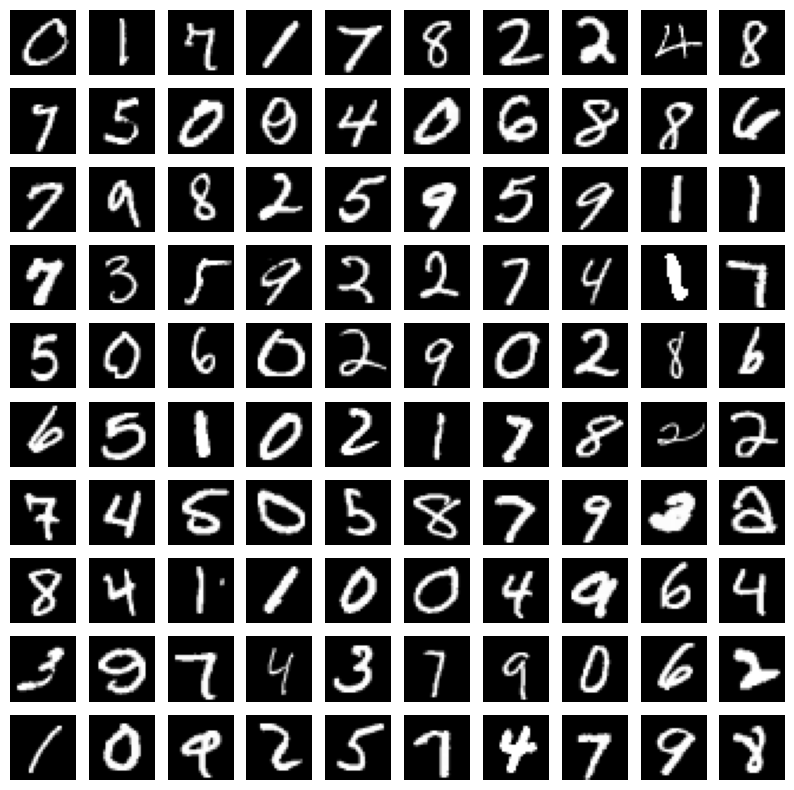

In [57]:
# sample 100 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=100)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(10,10))
for i in range(len(indexes)):
    plt.subplot(10, 10, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [58]:
# Flatten the images into vectors
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [59]:
# Define a function to create a DNN model with a given activation function
def create_model(activation):
    model = Sequential([
        Dense(64, input_shape=(784,), activation=activation),
        Dense(10, activation='softmax')
    ])
    return model

sigmoid Training Loss: 0.11428450047969818
sigmoid Training Accuracy: 0.9672499895095825
sigmoid Validation Loss: 0.1181505098938942
sigmoid Validation Accuracy: 0.9653000235557556
tanh Training Loss: 0.07841313630342484
tanh Training Accuracy: 0.9774666428565979
tanh Validation Loss: 0.09950115531682968
tanh Validation Accuracy: 0.9692999720573425
relu Training Loss: 0.07150588184595108
relu Training Accuracy: 0.9787999987602234
relu Validation Loss: 0.08862496167421341
relu Validation Accuracy: 0.9728000164031982


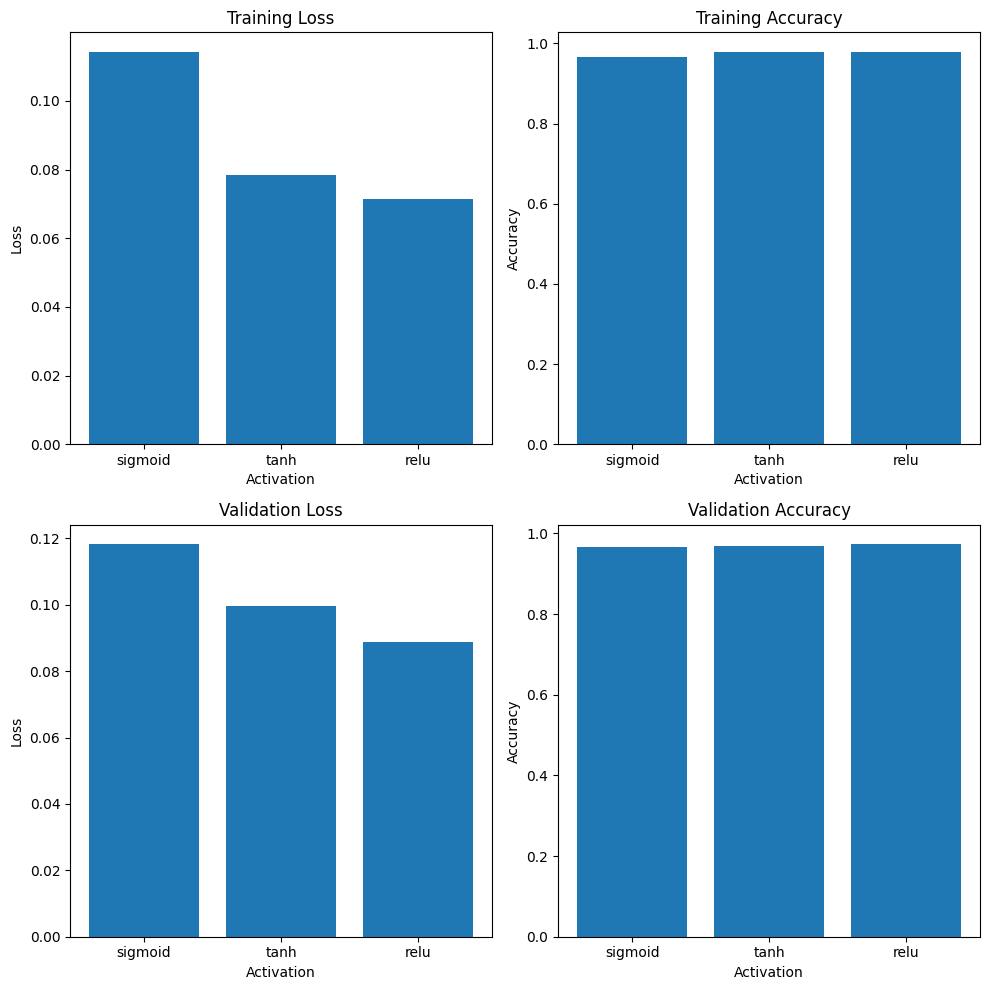

In [60]:
# Define the basic activation functions
basic_activations = ['sigmoid', 'tanh', 'relu']

# Train a model for each basic activation function and print the test accuracy
basic_history_dict = {}
final_results = {"Activation": [], "Training Loss": [], "Training Accuracy": [], "Validation Loss": [], "Validation Accuracy": []}
for activation in basic_activations:
    model = create_model(activation)
    model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, verbose=0)
    basic_history_dict[activation] = history
    # Print out the final training loss and accuracy
    print(f'{activation} Training Loss: {history.history["loss"][-1]}')
    print(f'{activation} Training Accuracy: {history.history["accuracy"][-1]}')

    # Print out the final validation loss and accuracy
    print(f'{activation} Validation Loss: {history.history["val_loss"][-1]}')
    print(f'{activation} Validation Accuracy: {history.history["val_accuracy"][-1]}')
    # Add the results to the final_results dictionary
    final_results["Activation"].append(activation)
    final_results["Training Loss"].append(history.history["loss"][-1])
    final_results["Training Accuracy"].append(history.history["accuracy"][-1])
    final_results["Validation Loss"].append(history.history["val_loss"][-1])
    final_results["Validation Accuracy"].append(history.history["val_accuracy"][-1])

# Convert the final_results dictionary to a DataFrame
results_df = pd.DataFrame(final_results)

# Plot the results in a bar plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].bar(results_df['Activation'], results_df['Training Loss'])
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Activation')
axs[0, 0].set_ylabel('Loss')

axs[0, 1].bar(results_df['Activation'], results_df['Training Accuracy'])
axs[0, 1].set_title('Training Accuracy')
axs[0, 1].set_xlabel('Activation')
axs[0, 1].set_ylabel('Accuracy')

axs[1, 0].bar(results_df['Activation'], results_df['Validation Loss'])
axs[1, 0].set_title('Validation Loss')
axs[1, 0].set_xlabel('Activation')
axs[1, 0].set_ylabel('Loss')

axs[1, 1].bar(results_df['Activation'], results_df['Validation Accuracy'])
axs[1, 1].set_title('Validation Accuracy')
axs[1, 1].set_xlabel('Activation')
axs[1, 1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

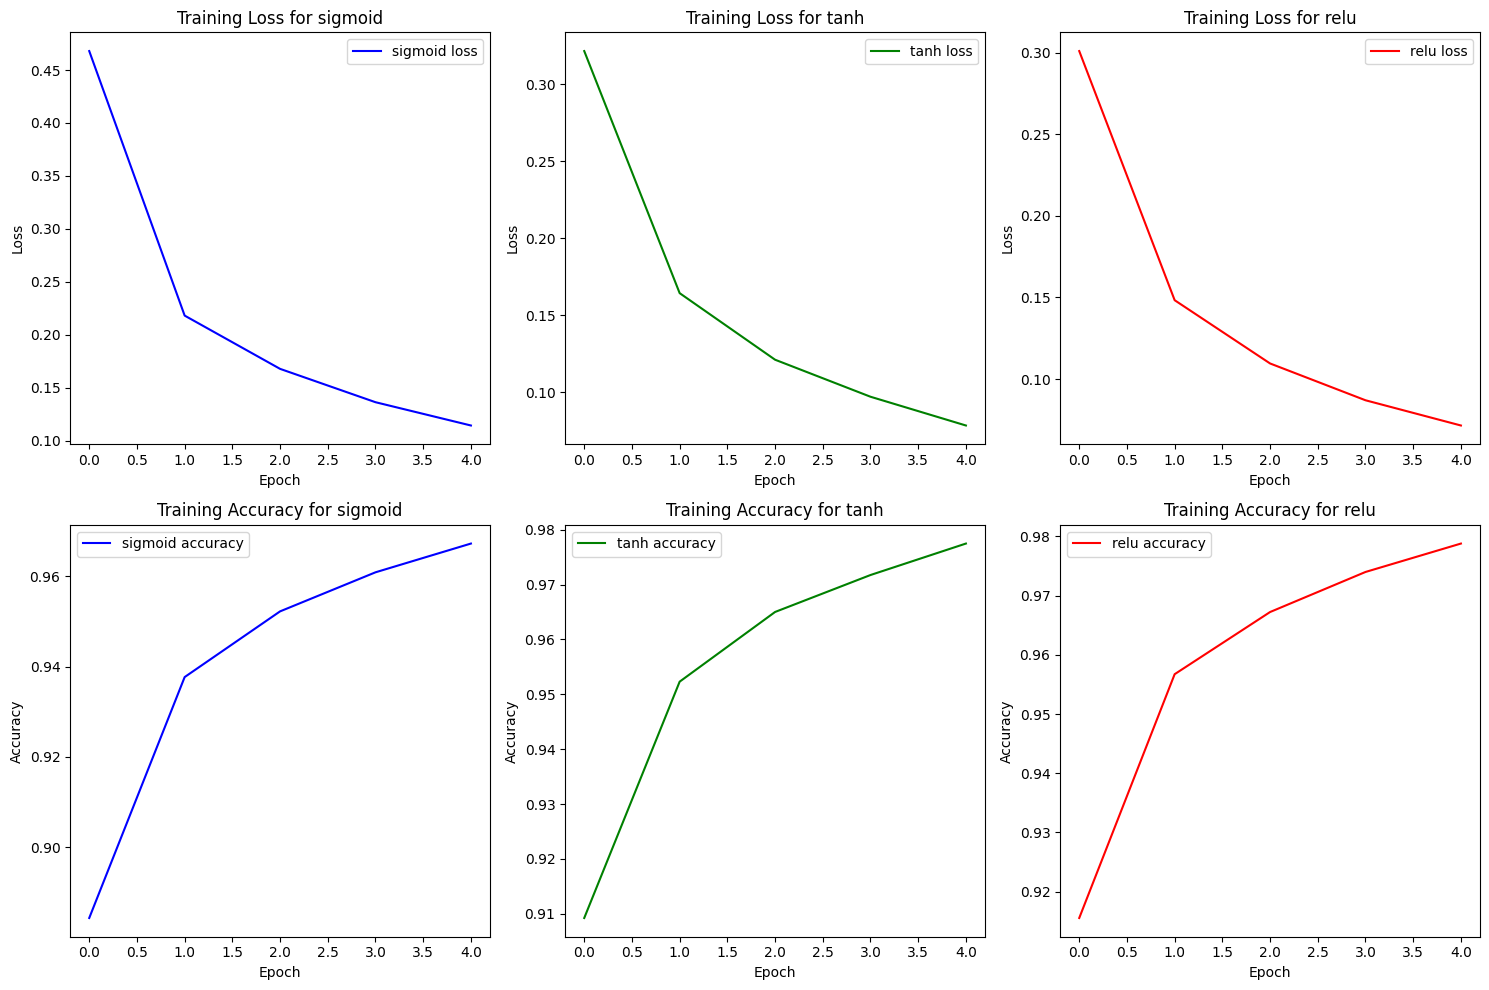

In [61]:
# Define a list of colors for the plots
colors = ['b', 'g', 'r']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, (activation, history) in enumerate(basic_history_dict.items()):
    axs[0, i].plot(history.history['loss'], label=f'{activation} loss', color=colors[i])
    axs[0, i].set_title(f'Training Loss for {activation}')
    axs[0, i].set(xlabel='Epoch', ylabel='Loss')
    axs[0, i].legend()

    axs[1, i].plot(history.history['accuracy'], label=f'{activation} accuracy', color=colors[i])
    axs[1, i].set_title(f'Training Accuracy for {activation}')
    axs[1, i].set(xlabel='Epoch', ylabel='Accuracy')
    axs[1, i].legend()

plt.tight_layout()
plt.show()


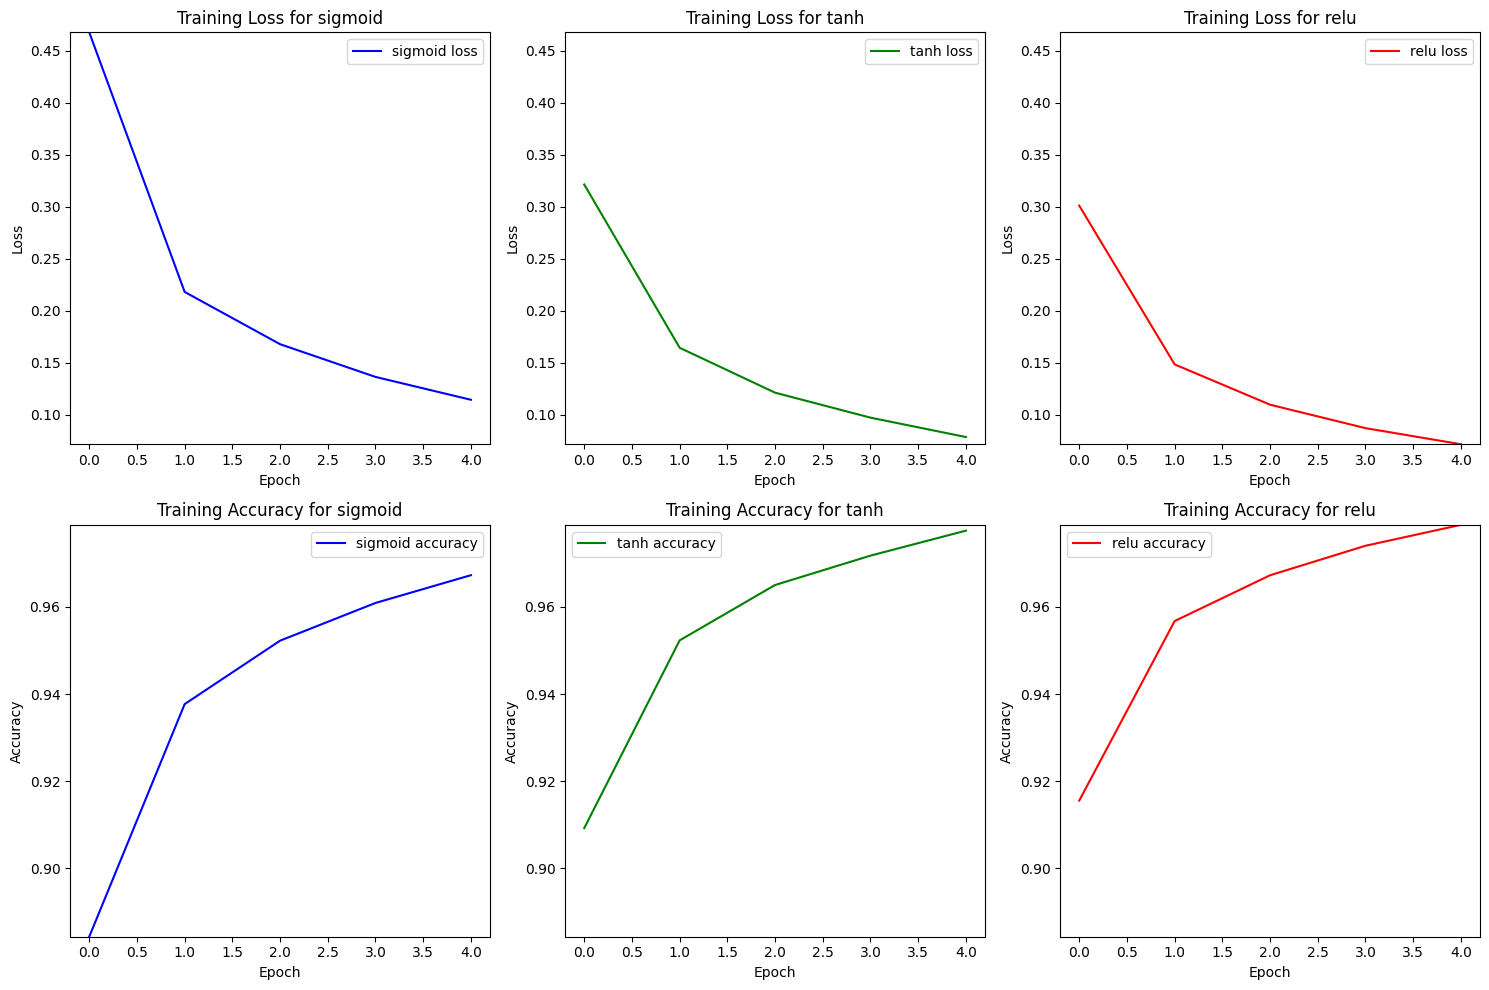

In [62]:
# Define a list of colors for the plots
colors = ['b', 'g', 'r']

# Calculate the maximum and minimum values for loss and accuracy
max_loss = max(max(history.history['loss']) for history in basic_history_dict.values())
min_loss = min(min(history.history['loss']) for history in basic_history_dict.values())
max_accuracy = max(max(history.history['accuracy']) for history in basic_history_dict.values())
min_accuracy = min(min(history.history['accuracy']) for history in basic_history_dict.values())

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, (activation, history) in enumerate(basic_history_dict.items()):
    axs[0, i].plot(history.history['loss'], label=f'{activation} loss', color=colors[i])
    axs[0, i].set_title(f'Training Loss for {activation}')
    axs[0, i].set(xlabel='Epoch', ylabel='Loss')
    axs[0, i].legend()
    axs[0, i].set_ylim([min_loss, max_loss])  # Set the same y-axis for loss

    axs[1, i].plot(history.history['accuracy'], label=f'{activation} accuracy', color=colors[i])
    axs[1, i].set_title(f'Training Accuracy for {activation}')
    axs[1, i].set(xlabel='Epoch', ylabel='Accuracy')
    axs[1, i].legend()
    axs[1, i].set_ylim([min_accuracy, max_accuracy])  # Set the same y-axis for accuracy

plt.tight_layout()
plt.show()


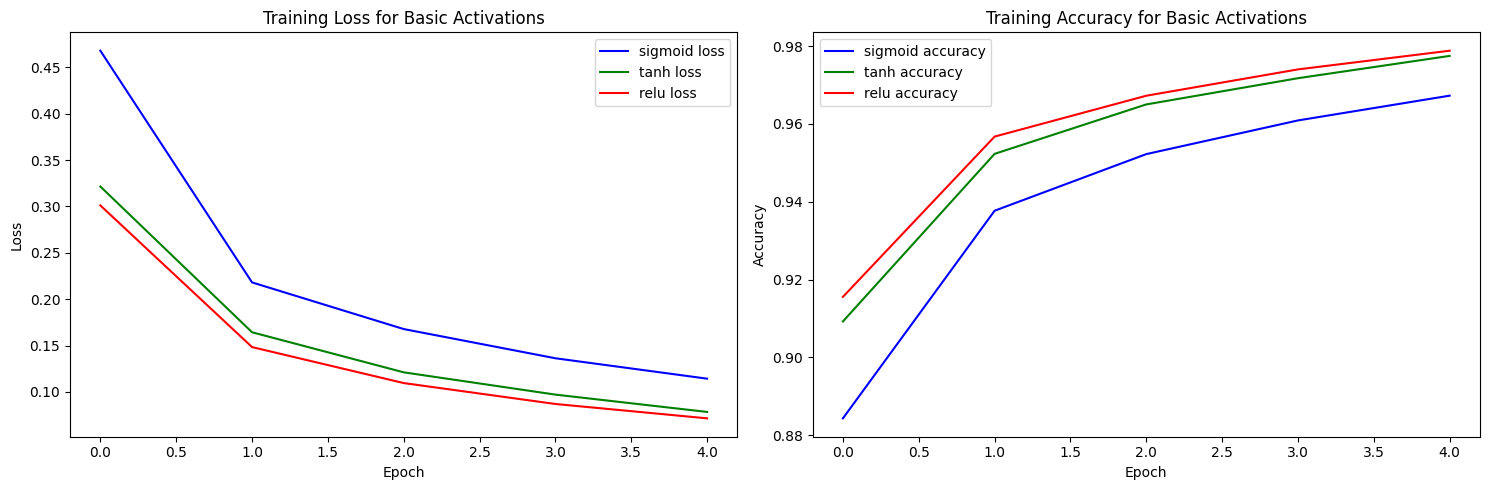

In [63]:
# Define a list of colors for the plots
colors = ['b', 'g', 'r']

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i, (activation, history) in enumerate(basic_history_dict.items()):
    axs[0].plot(history.history['loss'], label=f'{activation} loss', color=colors[i])
    axs[1].plot(history.history['accuracy'], label=f'{activation} accuracy', color=colors[i])

axs[0].set_title('Training Loss for Basic Activations')
axs[0].set(xlabel='Epoch', ylabel='Loss')
axs[0].legend()

axs[1].set_title('Training Accuracy for Basic Activations')
axs[1].set(xlabel='Epoch', ylabel='Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()


In [64]:
# Define the advanced activation functions and their names
advanced_activations = [LeakyReLU(), PReLU()]
advanced_activations_names = ['LeakyReLU', 'PReLU']

# Train a model for each advanced activation function and print the test accuracy
advanced_history_dict = {}
for i, activation in enumerate(advanced_activations):
    model = create_model(activation)
    model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, verbose=0)
    advanced_history_dict[advanced_activations_names[i]] = history

    # Print out the final training loss and accuracy
    print(f'{advanced_activations_names[i]} Training Loss: {history.history["loss"][-1]}')
    print(f'{advanced_activations_names[i]} Training Accuracy: {history.history["accuracy"][-1]}')

    # Print out the final validation loss and accuracy
    print(f'{advanced_activations_names[i]} Validation Loss: {history.history["val_loss"][-1]}')
    print(f'{advanced_activations_names[i]} Validation Accuracy: {history.history["val_accuracy"][-1]}')

LeakyReLU Training Loss: 0.10188984125852585
LeakyReLU Training Accuracy: 0.9696999788284302
LeakyReLU Validation Loss: 0.11224774271249771
LeakyReLU Validation Accuracy: 0.96670001745224
PReLU Training Loss: 0.059802357107400894
PReLU Training Accuracy: 0.9821666479110718
PReLU Validation Loss: 0.08334838598966599
PReLU Validation Accuracy: 0.975600004196167


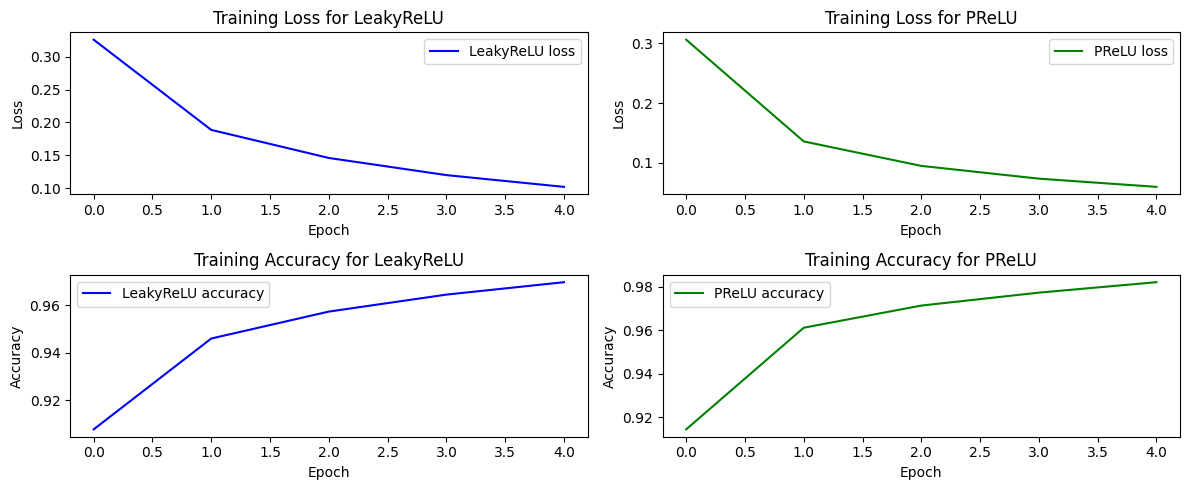

In [65]:
# Define a list of colors for the plots
colors = ['b', 'g']

fig, axs = plt.subplots(2, len(advanced_history_dict), figsize=(12, 5))

for i, (activation, history) in enumerate(advanced_history_dict.items()):
    axs[0, i].plot(history.history['loss'], label=f'{activation} loss', color=colors[i])
    axs[0, i].set_title(f'Training Loss for {activation}')
    axs[0, i].set(xlabel='Epoch', ylabel='Loss')
    axs[0, i].legend()

    axs[1, i].plot(history.history['accuracy'], label=f'{activation} accuracy', color=colors[i])
    axs[1, i].set_title(f'Training Accuracy for {activation}')
    axs[1, i].set(xlabel='Epoch', ylabel='Accuracy')
    axs[1, i].legend()

plt.tight_layout()
plt.show()

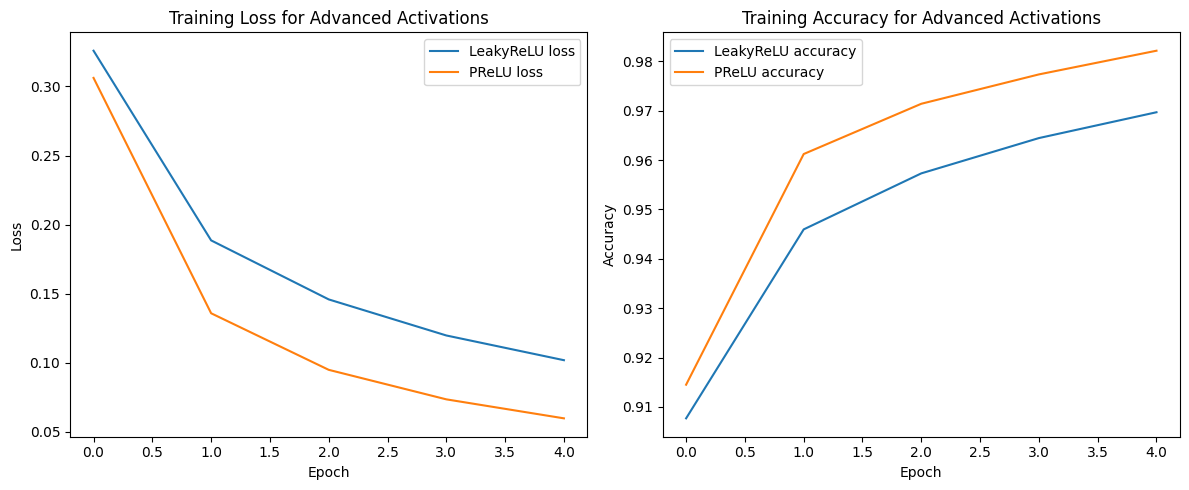

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for activation, history in advanced_history_dict.items():
    axs[0].plot(history.history['loss'], label=f'{activation} loss')
    axs[1].plot(history.history['accuracy'], label=f'{activation} accuracy')

axs[0].set_title('Training Loss for Advanced Activations')
axs[0].set(xlabel='Epoch', ylabel='Loss')
axs[0].legend()

axs[1].set_title('Training Accuracy for Advanced Activations')
axs[1].set(xlabel='Epoch', ylabel='Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()

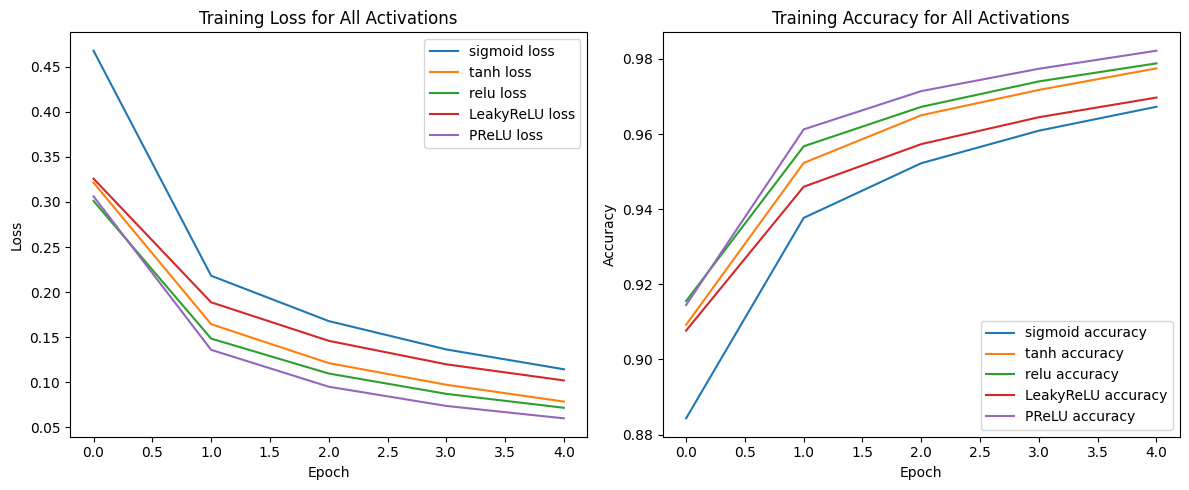

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for activation, history in {**basic_history_dict, **advanced_history_dict}.items():
    axs[0].plot(history.history['loss'], label=f'{activation} loss')
    axs[1].plot(history.history['accuracy'], label=f'{activation} accuracy')

axs[0].set_title('Training Loss for All Activations')
axs[0].set(xlabel='Epoch', ylabel='Loss')
axs[0].legend()

axs[1].set_title('Training Accuracy for All Activations')
axs[1].set(xlabel='Epoch', ylabel='Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()


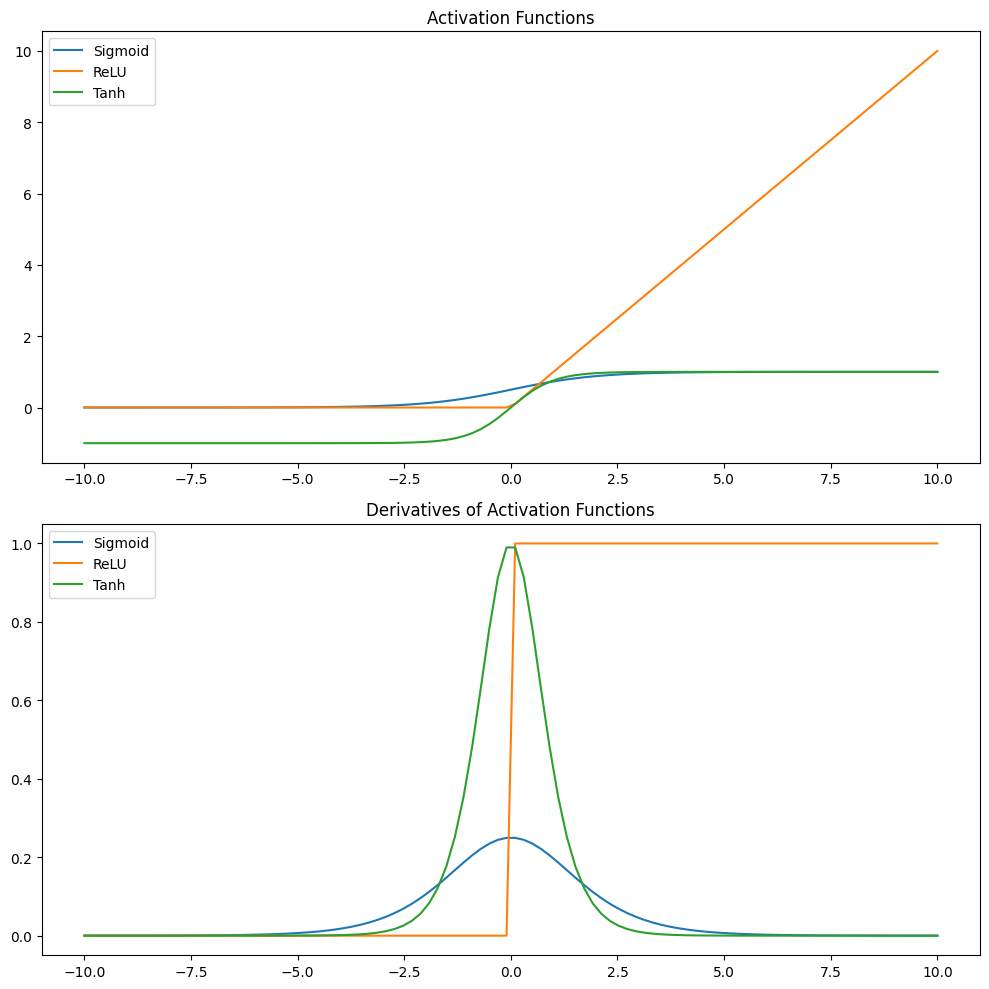

In [68]:
# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Define the derivatives of the activation functions
def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def derivative_relu(x):
    return np.where(x <= 0, 0, 1)

def derivative_tanh(x):
    return 1 - np.square(np.tanh(x))

# Generate an array of values from -10 to 10
x = np.linspace(-10, 10, 100)

# Calculate the activations and their derivatives
activations = {'Sigmoid': sigmoid(x), 'ReLU': relu(x), 'Tanh': tanh(x)}
derivatives = {'Sigmoid': derivative_sigmoid(x), 'ReLU': derivative_relu(x), 'Tanh': derivative_tanh(x)}

# Plot the activation functions and their derivatives
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot each activation function
for activation, y in activations.items():
    axs[0].plot(x, y, label=activation)
axs[0].set_title('Activation Functions')
axs[0].legend()

# Plot the derivative of each activation function
for activation, y in derivatives.items():
    axs[1].plot(x, y, label=activation)
axs[1].set_title('Derivatives of Activation Functions')
axs[1].legend()

plt.tight_layout()
plt.show()
